In [2]:

from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin1")


In [4]:
#TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['text'])


In [5]:
# Dimensionality reduction (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


In [6]:
#KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_pca)


In [7]:
#Hierarchical clustering
sample_df = df.sample(n=500, random_state=42)
sample_X_pca = X_pca[sample_df.index]

hierarchical = AgglomerativeClustering(n_clusters=2)
sample_df['hierarchical_cluster'] = hierarchical.fit_predict(sample_X_pca)


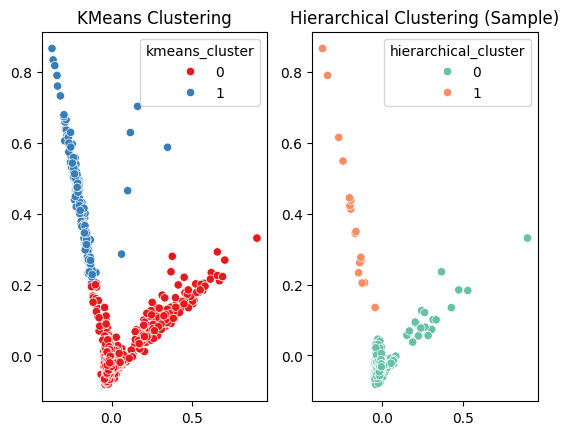

In [8]:
# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title("KMeans Clustering")

# Hierarchical
plt.subplot(1, 2, 2)
sns.scatterplot(x=sample_X_pca[:, 0], y=sample_X_pca[:, 1], hue=sample_df['hierarchical_cluster'], palette='Set2')
plt.title("Hierarchical Clustering (Sample)")
plt.show()


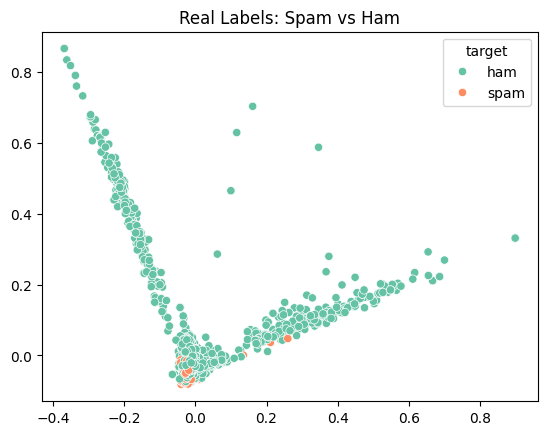

In [9]:
#Compare with actual labels
# Plot actual labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='Set2')
plt.title("Real Labels: Spam vs Ham")
plt.show()


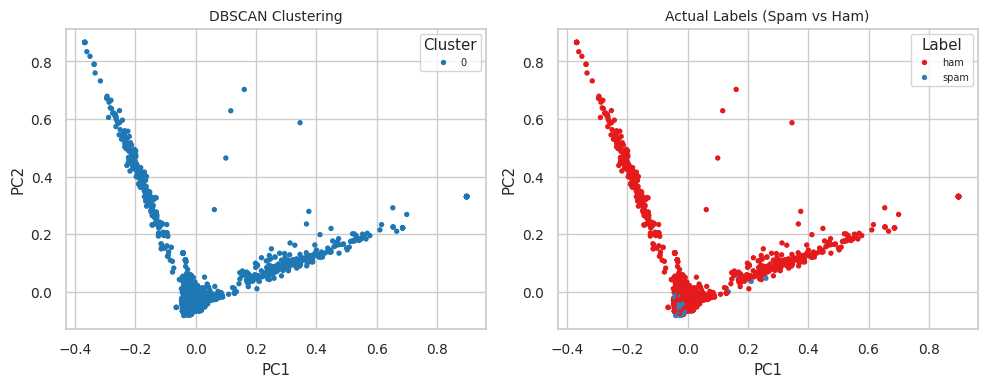

In [11]:
from sklearn.cluster import DBSCAN

# --- DBSCAN ---
# Parameters may require tuning: eps controls neighborhood size, min_samples is the minimum number of points to form a cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_pca)  # -1 means noise

# --- Plot DBSCAN Results ---
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid", font_scale=0.9)

# 1. DBSCAN Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['dbscan_cluster'],
                palette='tab10', s=15, edgecolor='none')
plt.title('DBSCAN Clustering', fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best', fontsize=7)

# 2. Actual Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], # Changed 'label' to 'target'
                palette='Set1', s=15, edgecolor='none')
plt.title('Actual Labels (Spam vs Ham)', fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label', loc='best', fontsize=7)

plt.tight_layout()
plt.show()